<a href="https://colab.research.google.com/github/OctavaOrigin/Deep-Learning/blob/main/%D0%92%D1%80%D0%B5%D0%BC%D0%B5%D0%BD%D0%BD%D1%8B%D0%B5_%D1%80%D1%8F%D0%B4%D1%8B_%D0%A1%D1%82%D0%B0%D1%86%D0%B8%D0%BE%D0%BD%D0%B0%D1%80%D0%BD%D0%BE%D1%81%D1%82%D1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
passengers = pd.read_csv('international-airline-passengers.csv')
car_sales = pd.read_csv('monthly-car-sales-in-quebec-1960.csv')
company_sales = pd.read_csv('monthly-sales-of-company-x-jan-6.csv')

In [53]:
passengers = passengers.drop(passengers.index[-1])

In [54]:
passengers

,Month,International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
139,1960-08,606.0
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0


In [55]:
all_series = {
    'Monthly international airline passengers. (in thousands)': passengers['International airline passengers: monthly totals in thousands. Jan 49 ? Dec 60'],
    'monthly-car-sales-in-quebec-1960': car_sales['Count'],
    'monthly-sales-of-company-x-jan-6': company_sales['Count']
}

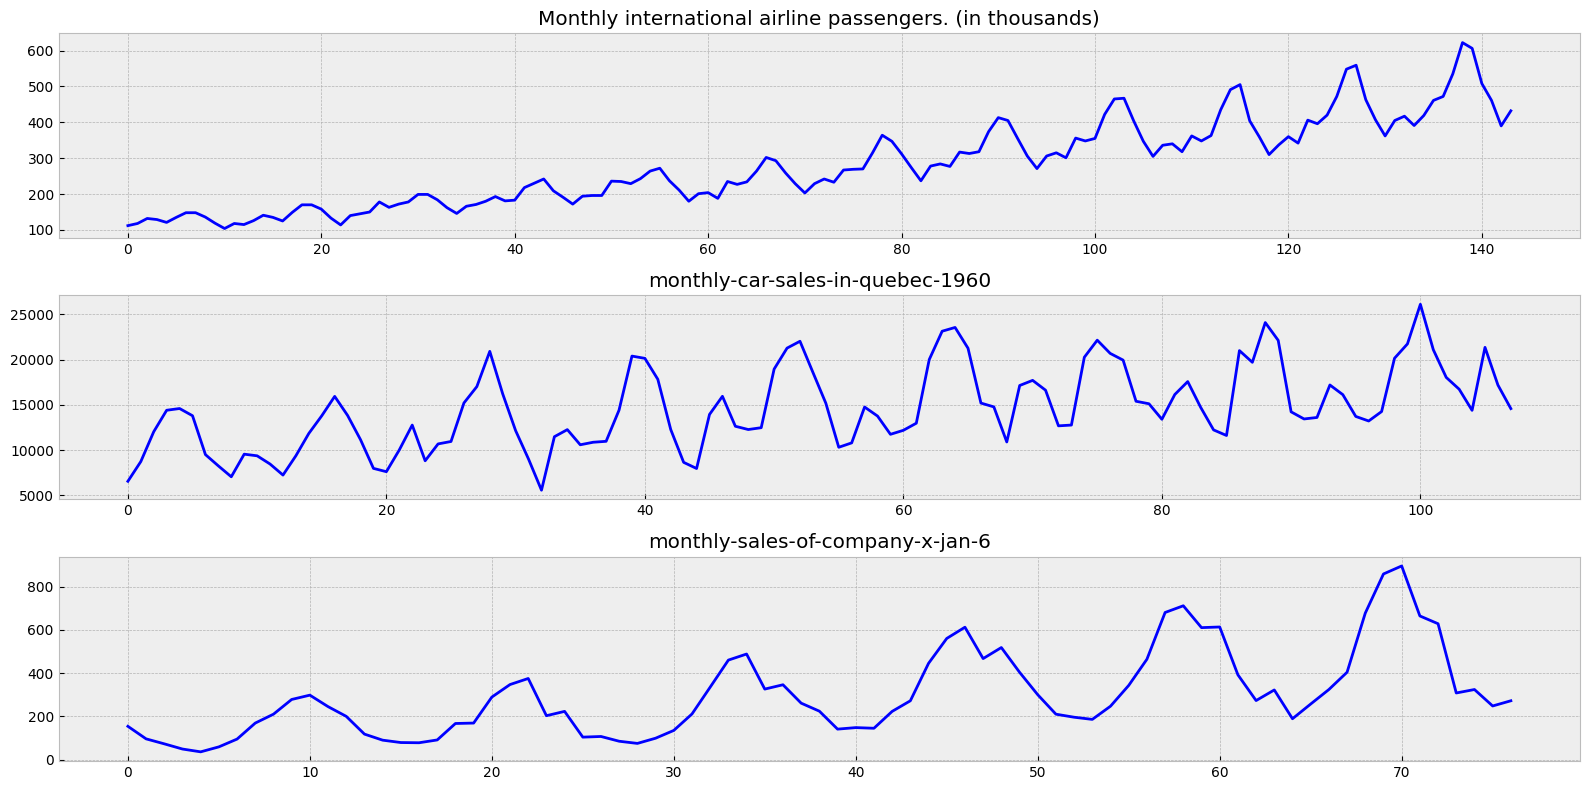

In [56]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 1)
    for i, key in enumerate(all_series.keys()):
        ts_ax = plt.subplot2grid(layout, (i, 0))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

###Тест Дики-Фуллера

In [57]:
from statsmodels.tsa.stattools import adfuller

In [58]:
def adf(series):
  result = adfuller(series)
  return result[1]

In [59]:
for key in all_series:
  print(f'p-value for {key}: {adf(all_series[key])}')

p-value for Monthly international airline passengers. (in thousands): 0.991880243437641
p-value for monthly-car-sales-in-quebec-1960: 0.6632691049832861
p-value for monthly-sales-of-company-x-jan-6: 0.9888894205170052


###Нормализируем

In [60]:
from scipy.stats import boxcox

In [61]:
for key in all_series:
  transformed_data, lambda_value = boxcox(all_series[key])
  all_series[key] = pd.Series(transformed_data)

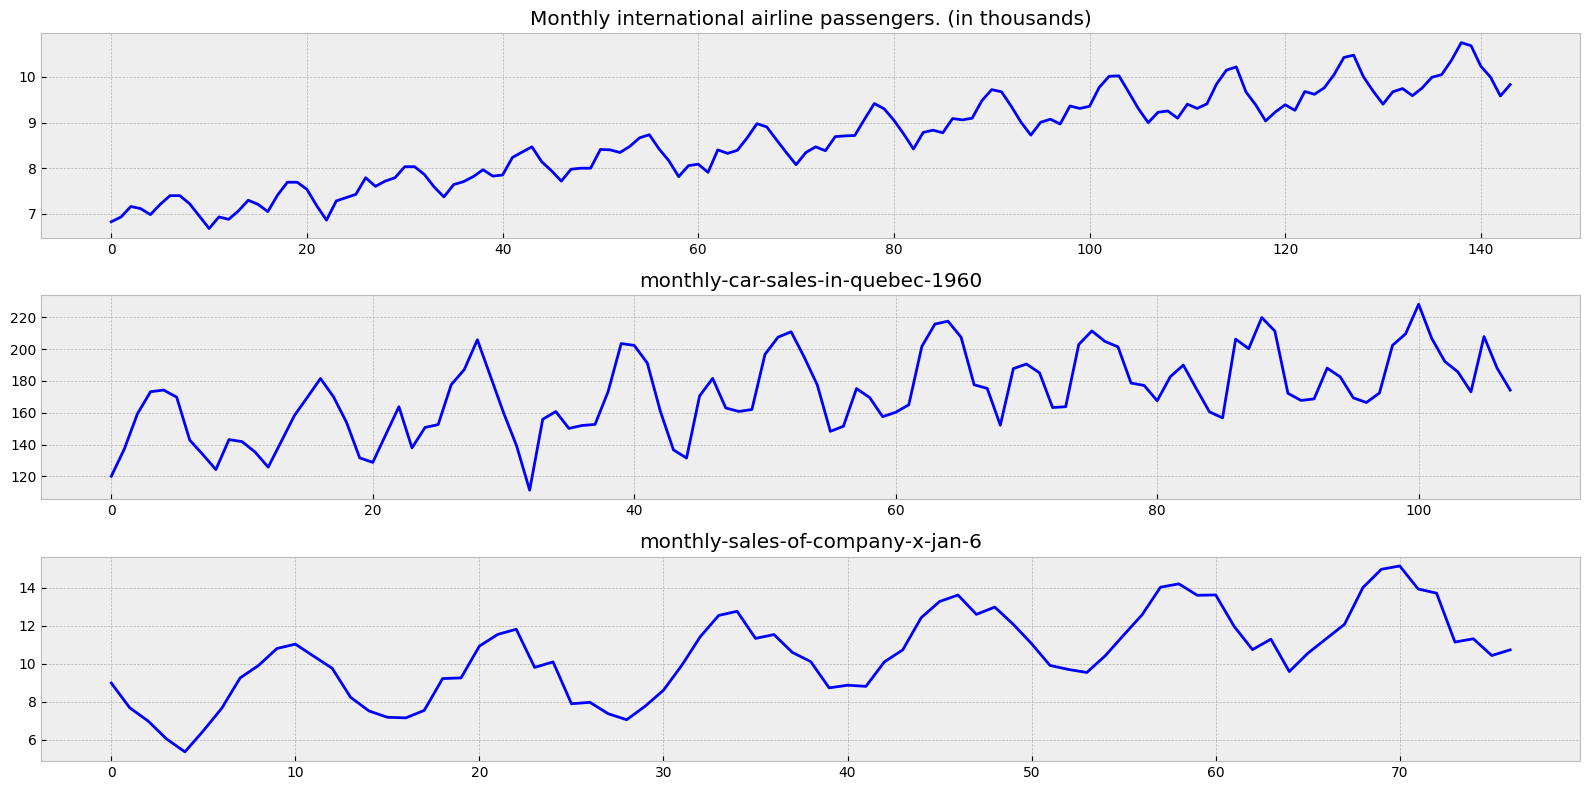

In [62]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 1)
    for i, key in enumerate(all_series.keys()):
        ts_ax = plt.subplot2grid(layout, (i, 0))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

###Дифференцируем

In [63]:
for key in all_series:
  all_series[key] = pd.Series(np.diff(all_series[key].values))

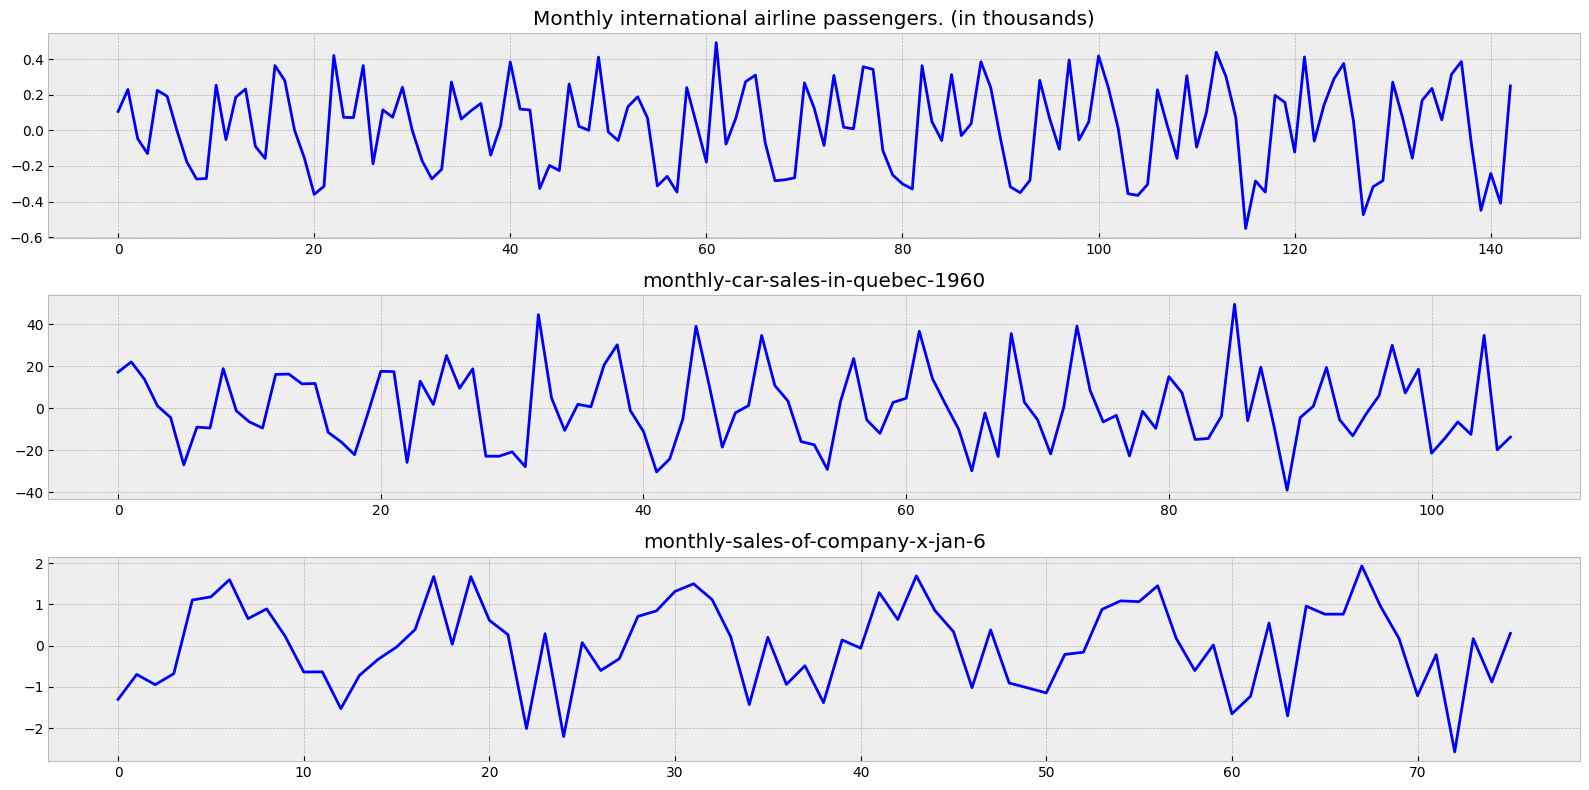

In [64]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 1)
    for i, key in enumerate(all_series.keys()):
        ts_ax = plt.subplot2grid(layout, (i, 0))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)

    plt.tight_layout()

###Снова Тест Дики-Фуллера

In [65]:
for key in all_series:
  print(f'p-value for {key}: {adf(all_series[key])}')

p-value for Monthly international airline passengers. (in thousands): 0.04873833392661749
p-value for monthly-car-sales-in-quebec-1960: 0.0004942158833115142
p-value for monthly-sales-of-company-x-jan-6: 0.015599469714685638


Отклоняем нулевую гипотезу для каждого ряда